In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
import os
import time
import matplotlib.pyplot as plt
import itertools

# Based on the Google Tutorial: https://www.tensorflow.org/tutorials/text/text_generation

tf.config.run_functions_eagerly(True)  # Originally needed to enable this particular model to train

In [ ]:
!pip install tensorlayer

In [ ]:
import tensorlayer as tl # Used for NLP functions

In [ ]:
# May no longer be needed depending on where the dataset is stored 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path_to_file = "" # Placeholder to the txt file of your choosing

In [ ]:
# This chunk of code simplifies the text characters such that individual words are added to the dictionary as opposed to words with adjacent grammar objects (such as full stops)

text = tl.nlp.simple_read_words(filename=path_to_file)

#input = ''.join(text) #This function is needed because the input is originally a list object, so we convert to a string

words = text
words = [word.strip('()"') for word in words]
words = [word.replace("'s", '') for word in words]
words = [word.replace("!", '.') for word in words]
words = [word.replace('..', '') for word in words]
words = [word.replace('...', '') for word in words]

words = ''.join(words) #This function is needed because the input is originally a list object, so we convert to a string

text = words
print(text)

In [ ]:
# original text file without removed grammar
original_text = tl.nlp.simple_read_words(filename=path_to_file)
print(original_text)

In [ ]:
# This code is used to identify all unique words in the text file
def Unique_Words(input):

    input = ''.join(input) #This function is needed because the input is originally a list object, so we convert to a string
    
    words = input.split() #Converts the larger string into a list of substrings

    #finding unique
    unique_words = []
    for word in words:
        if word not in unique_words:
            unique_words.append(word)

    #sort
    unique_words.sort()

    #print(unique_words)
    print(f'Number of unique words = {len(unique_words)}')
    #print('End of Unique_Words')
    return unique_words

In [ ]:
# We create a unique ID for each unique word in the text
tokens = Unique_Words(text)
print(tokens)

Number of unique words = 3311
["'em,", "'em.", "'s", '.', '...', '1', '2', '31174...', '3224.', '328.', '7', 'A', 'ALIEN', 'ALL', 'ANAKIN', 'ANAKIN.', 'ANAKIN/OBI-WAN', 'ANAKIN:', 'ARFOUR', "ARFOUR's", 'ARTOO', 'ARTOO.', 'Absolutely,', 'Act', 'Activate', 'Add', "Admiral's", 'After', 'Against', 'Agreed.', 'Ahead', 'Ahhhh,', 'Alarms', 'All', 'Allow', 'Always', 'Ambassador', 'Amedda', 'Amendment', 'Anakin', "Anakin's", 'Anakin,', 'Anakin.', 'Anakin...', 'Anakin?', 'Anakin??', 'And', 'And?', 'Annie,', 'Annie.', 'Another', 'Apparently', 'Are', 'Area,', "Aren't", 'Arfour,', 'Arfour.', 'Armies.', 'Army', 'Army,', 'Artoo', "Artoo's", 'Artoo,', 'Artoo.', 'Artoo...', 'Artoo?', 'As', 'Astro', 'At', 'Attachment', 'Attack', 'Attitude...', 'B?', 'BAIL-ORGANA', 'BANA', 'BANA-BREEMU', 'BATTLE', 'BATTLE-DROID', 'BODYGUARD', 'BREEMU', 'Back', 'Bad?', 'Bail', 'Bail,', 'Ball,', 'Ballet', 'Baron', 'Battle', 'Battleship.', 'Battleships.', 'Be', 'Beautiful,', 'Beeping', 'Before', 'Behind', 'Besides,', 'Blast

In [ ]:
# Create a vocabulary from the words in the text file (maps words to IDs)
vocab = tl.nlp.build_vocab(tokens)

vocab_size = len(vocab)
vocab

In [ ]:
# Create a reverse vocabulary from the words in the text file (maps IDs to words)
reverse_vocab = tl.nlp.build_reverse_dictionary(vocab)
reverse_vocab

In [ ]:
# Convert the array of strings into a RaggedTensor for the later TF functions
text_words = tf.strings.split(tokens)
text_words

<tf.RaggedTensor [[b"'em,"], [b"'em."], [b"'s"], [b'.'], [b'...'], [b'1'], [b'2'], [b'31174...'], [b'3224.'], [b'328.'], [b'7'], [b'A'], [b'ALIEN'], [b'ALL'], [b'ANAKIN'], [b'ANAKIN.'], [b'ANAKIN/OBI-WAN'], [b'ANAKIN:'], [b'ARFOUR'], [b"ARFOUR's"], [b'ARTOO'], [b'ARTOO.'], [b'Absolutely,'], [b'Act'], [b'Activate'], [b'Add'], [b"Admiral's"], [b'After'], [b'Against'], [b'Agreed.'], [b'Ahead'], [b'Ahhhh,'], [b'Alarms'], [b'All'], [b'Allow'], [b'Always'], [b'Ambassador'], [b'Amedda'], [b'Amendment'], [b'Anakin'], [b"Anakin's"], [b'Anakin,'], [b'Anakin.'], [b'Anakin...'], [b'Anakin?'], [b'Anakin??'], [b'And'], [b'And?'], [b'Annie,'], [b'Annie.'], [b'Another'], [b'Apparently'], [b'Are'], [b'Area,'], [b"Aren't"], [b'Arfour,'], [b'Arfour.'], [b'Armies.'], [b'Army'], [b'Army,'], [b'Artoo'], [b"Artoo's"], [b'Artoo,'], [b'Artoo.'], [b'Artoo...'], [b'Artoo?'], [b'As'], [b'Astro'], [b'At'], [b'Attachment'], [b'Attack'], [b'Attitude...'], [b'B?'], [b'BAIL-ORGANA'], [b'BANA'], [b'BANA-BREEMU'], [b'BA

In [ ]:
# This part is used to test whether the unique words print as a list of strings

words_list = text_words.to_list()
words_list = list(itertools.chain(*words_list)) #Creates a list of strings instead of a list of lists (flattens)
b''.join(words_list).decode('utf-8') # Needed to decode the bytes, as this was the original format
words_list=[x.decode('utf-8') for x in words_list] # We decode the bytes as defined above
print(words_list)

print(type(words_list))
print(len(words_list))

# There are a couple of weird words towards the end \xe2\x80\xa6

["'em,", "'em.", "'s", '.', '...', '1', '2', '31174...', '3224.', '328.', '7', 'A', 'ALIEN', 'ALL', 'ANAKIN', 'ANAKIN.', 'ANAKIN/OBI-WAN', 'ANAKIN:', 'ARFOUR', "ARFOUR's", 'ARTOO', 'ARTOO.', 'Absolutely,', 'Act', 'Activate', 'Add', "Admiral's", 'After', 'Against', 'Agreed.', 'Ahead', 'Ahhhh,', 'Alarms', 'All', 'Allow', 'Always', 'Ambassador', 'Amedda', 'Amendment', 'Anakin', "Anakin's", 'Anakin,', 'Anakin.', 'Anakin...', 'Anakin?', 'Anakin??', 'And', 'And?', 'Annie,', 'Annie.', 'Another', 'Apparently', 'Are', 'Area,', "Aren't", 'Arfour,', 'Arfour.', 'Armies.', 'Army', 'Army,', 'Artoo', "Artoo's", 'Artoo,', 'Artoo.', 'Artoo...', 'Artoo?', 'As', 'Astro', 'At', 'Attachment', 'Attack', 'Attitude...', 'B?', 'BAIL-ORGANA', 'BANA', 'BANA-BREEMU', 'BATTLE', 'BATTLE-DROID', 'BODYGUARD', 'BREEMU', 'Back', 'Bad?', 'Bail', 'Bail,', 'Ball,', 'Ballet', 'Baron', 'Battle', 'Battleship.', 'Battleships.', 'Be', 'Beautiful,', 'Beeping', 'Before', 'Behind', 'Besides,', 'Blast', 'Blasting', 'Blasts', 'Blue

In [ ]:
def words_from_ids(ids):

    words = []

    example_nparray = np.array([1, 2, 3, 4, 5]) # Just needed a reference nparray for comparison

    #Sometimes, the input IDs are given as either a tensor, or a numpy array
    
    if type(ids) == type(example_nparray): 
        print('do nothing')
    else:
        ids = ids.numpy()

    for x in range(len(ids)):
        words.append(reverse_vocab[ids[x]])

    return words

In [ ]:
def ids_from_words(words):

  ids = []

  words = ''.join(words)
  words = words.split()

  for word in words:
      ids.append(vocab[word])

  return ids

In [ ]:
# This function can be called to re-join chars in bundles in similar style to the original text
def text_from_ids(ids):
  return tf.strings.reduce_join(words_from_ids(ids), axis=-1, separator=' ')

In [ ]:
#Testing to see if the voabulary can be used to map the strings to their IDs
for x in range(len(words_list)):
    ids = vocab[words_list[x]]
    print(ids)

In [ ]:
# Testing to see if all unique words in the text file have been allocated unique IDs

all_ids = []

all_ids = ids_from_words(text)

#for x in range(len(text)):
#    all_ids.append(vocab)

print(all_ids)

[11, 2040, 3030, 754, 1864, 712, 1657, 1536, 1535, 882, 11, 3144, 2618, 2241, 2845, 2651, 851, 2972, 891, 1620, 2972, 389, 645, 1616, 1047, 712, 2567, 3220, 1219, 1887, 1874, 671, 629, 519, 1892, 1231, 3105, 874, 1047, 2972, 2588, 570, 380, 168, 196, 632, 835, 1802, 2256, 989, 2710, 218, 1892, 1476, 336, 712, 2889, 2175, 2972, 1558, 1391, 1979, 268, 286, 1755, 2919, 1887, 2972, 519, 1062, 791, 1929, 140, 483, 1978, 2241, 2972, 266, 544, 66, 2972, 552, 199, 58, 875, 3040, 1597, 2972, 957, 1062, 3250, 2973, 3140, 1840, 3097, 345, 363, 1977, 712, 1295, 2150, 3040, 2524, 2972, 1064, 145, 485, 1378, 3040, 2538, 712, 519, 70, 172, 157, 3040, 2322, 3250, 2972, 170, 851, 653, 345, 602, 1453, 791, 1772, 3055, 790, 1442, 87, 172, 510, 1892, 2256, 40, 2680, 512, 1892, 2256, 442, 2680, 11, 1671, 2788, 914, 1892, 2539, 851, 2972, 3037, 345, 2681, 1188, 2973, 856, 1864, 712, 2934, 905, 433, 994, 3020, 2972, 1589, 3250, 712, 1648, 317, 2677, 2560, 3159, 14, 2760, 851, 1768, 973, 712, 649, 229, 199, 8

In [ ]:
# Declaring the set of unique character IDs as the dataset for the ML problem
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids) 

In [ ]:
# It is necessary to break the text into chunks, each containing (seq_length) number of chars from the text
# In this ML script, each sample consists of 101 chars of the original text

seq_length = 20
examples_per_epoch = len(text)//(seq_length+1)  # // = Floor Division
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True) 
sequences

print(len(text))

78301


In [ ]:
# Confirm that the batch size is 21 words long

for seq in sequences.take(1):
  print(seq)
  print(type(seq))
  print(words_from_ids(seq))

print()
# Re-join the chars in bundles of 5 to visualize the original text format
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

tf.Tensor(
[  11 2040 3030  754 1864  712 1657 1536 1535  882   11 3144 2618 2241
 2845 2651  851 2972  891 1620 2972], shape=(21,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>
['A', 'long', 'time', 'ago', 'in', 'a', 'galaxy', 'far,', 'far', 'away.', 'A', 'vast', 'sea', 'of', 'stars', 'serves', 'as', 'the', 'backdrop', 'for', 'the']

b'A long time ago in a galaxy far, far away. A vast sea of stars serves as the backdrop for the'
b'Main Title, followed by a rollup, which crawls into infinity. War. The Republic is crumbling under attacks by the ruthless Sith'
b'Lord, Count Dooku. There are heroes on both sides. Evil is everywhere. In a stunning move, the fiendish droid leader, General'
b'Grievous, has swept into the Republic capital and kidnapped Chancellor Palpatine, leader of the Galactic Senate. As the Separatist Droid Army'
b'attempts to flee the besieged capital with their valuable hostage, two Jedi Knights lead a desperate mission to rescue the captive'


In [ ]:
# For each of the sequences (chunks), both the inputs and the targets contain the same length of text.
# The targets are a shifted version of the inputs, shifted by one character: Input = Hell, Output = ello
# From this function, we can determine the inputs and labels for each

def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

In [ ]:
# Example: The split_input_target function in use
split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [ ]:
# sequences = Data that has already been separated into samples (101 chars per sample)
# The dataset object will generate the samples and the labels used in the model (as defined in function split_input_target)

dataset = sequences.map(split_input_target)
dataset

<MapDataset shapes: ((20,), (20,)), types: (tf.int32, tf.int32)>


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
# Before feeding this data into the model, the data is organized into batches
# It is best to shuffle the data to avoid unnecessary correlation between different batches

# Each Batch will consist of 64 sequences (made of 20 words/samples each)
# A Batch can be composed of sample sequences or individual samples, depending on its usage

BATCH_SIZE = 64

# The Buffer is used when shuffling the data so that we do not use memory for this operation
# The optimal Buffer size should be greater or equal to (89986//101 = 899)

BUFFER_SIZE = 10000

# Prefetching overlaps the preprocessing and model execution of a training step. 
# Doing so reduces the step time to the maximum (as opposed to the sum) of the training and the time it takes to extract the data.

# For more detailed info: https://www.tensorflow.org/guide/data_performance

# tf.data.experimental = Experimental API for building Input Pipelines
# The number of elements to pre-fetch should be equal to the number of batches consumed by a single training step.
# The AUTOTUNE option tunes the prefetching element value dynamically during runtime.

dataset = (dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE))
dataset

# The samples and labels will have the same dimensions due to split_input_target
# Avoid running more than once, as this changes the Prefetch shapes

<PrefetchDataset shapes: ((64, 20), (64, 20)), types: (tf.int32, tf.int32)>

In [ ]:
# Length of the vocabulary in chars. The output layer consists of (vocab_size) neurons
print(vocab_size)

# The embedding dimension
# The input layer. A trainable lookup table that will map each unique ID to a vector with embedding_dim dimensions
embedding_dim = 256

# Number of RNN units
rnn_units_1 = 512
rnn_units_2 = 128
Intermediate_Dense_units = 256

3311


In [ ]:
def process_data(data):

    data = ' '.join(data) #This function is needed because the input is originally a list object, so we convert to a string
    data = data.split()

    return data

In [ ]:
# Develop a class that can Build the network

class MyModel(tf.keras.Model):

    #This first part of the class is just declaring all the unique layers you will use
  def __init__(self, vocab_size, embedding_dim, rnn_units):
      super().__init__(self)
      self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim) # This is where we declare our input vocabulary. Turns integers into dense vectors.
      self.gru_1 = tf.keras.layers.GRU(rnn_units, return_sequences=True, return_state=True, dropout=0.2)
      self.dropout = tf.keras.layers.Dropout(0.3) 
      self.intermediate_dense = tf.keras.layers.Dense(rnn_units, activation='relu')
      self.dense_output = tf.keras.layers.Dense(vocab_size)

  # This next layer is to build the neural network based on the layers defined in previous part of the function
  def call(self, inputs, states=None, return_state=False, training=False):
      x = inputs
      x = self.embedding(x, training=training)
      if states is None:
        states = self.gru_1.get_initial_state(x)

    # If we had used LSTM, we would have received "input", "output" and "forget" return categories, instead of just 2
      x, states = self.gru_1(x, initial_state=states, training=training)
      x = self.intermediate_dense(x, training=training)
      x = self.dropout(x, training=training)
      x = self.dense_output(x, training=training)

      if return_state:
        return x, states
      else:
        return x

In [ ]:
print(vocab_size)

model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units_1)

3311


In [ ]:
# Running the model to see if it behaves as expected
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 20, 3311) # (batch_size, sequence_length, vocab_size)


In [ ]:
# The following code is used to view the predictor model without any training

sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

#print(type(sampled_indices))

print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'industrial part of the city is surrounded by Emergency Fire Speeders. The smoking ship approaches as five Fireships spray it'

do nothing
Next Char Predictions:
 b'betray couch talked moved Explode. Grievous electrical learn, fortyfive- feelings, electricity hurry. screaming. Sand dying. sparks, vulture up, wall. this'


In [ ]:
# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.002)

# Because your model returns logits, you need to set the from_logits flag (False by default)
# Logits = The raw predictions which come out of the last layer of the neural network.

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimiser,
              loss=loss,
              metrics=['accuracy'])

model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  847616    
_________________________________________________________________
gru (GRU)                    multiple                  1182720   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  262656    
_________________________________________________________________
dense_1 (Dense)              multiple                  1698543   
Total params: 3,991,535
Trainable params: 3,991,535
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# This section of the code is for checking the initial loss qualities of the example (untrained) text generation
example_batch_loss = loss(target_example_batch, example_batch_predictions)
mean_loss = example_batch_loss.numpy().mean()
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", mean_loss)

Prediction shape:  (64, 20, 3311)  # (batch_size, sequence_length, vocab_size)
Mean loss:         8.105212


In [ ]:
# This function will be called to plot the history of the model accuracy

def plot_history(history):
  
    #Plots accuracy/loss for training/validation set as a function of the epochs
    training_loss = history.history['loss'] #We only used a training set in this ML problem

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Adding axis labels
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r--')
    plt.show()

In [ ]:
dataset

<PrefetchDataset shapes: ((64, 20), (64, 20)), types: (tf.int32, tf.int32)>

In [ ]:
# train model

EPOCHS = 50
history = model.fit(dataset, epochs=EPOCHS)

model.summary()

Epoch 1/50
10/10 [==============================] - 8s 824ms/step - loss: 7.8983 - accuracy: 0.0405
Epoch 2/50
10/10 [==============================] - 8s 818ms/step - loss: 7.1906 - accuracy: 0.0255
Epoch 3/50
10/10 [==============================] - 8s 811ms/step - loss: 6.8972 - accuracy: 0.0245
Epoch 4/50
10/10 [==============================] - 8s 831ms/step - loss: 6.6749 - accuracy: 0.0261
Epoch 5/50
10/10 [==============================] - 8s 803ms/step - loss: 6.4565 - accuracy: 0.0473
Epoch 6/50
10/10 [==============================] - 8s 818ms/step - loss: 6.3235 - accuracy: 0.0648
Epoch 7/50
10/10 [==============================] - 8s 819ms/step - loss: 6.1705 - accuracy: 0.0785
Epoch 8/50
10/10 [==============================] - 8s 809ms/step - loss: 5.9604 - accuracy: 0.0902
Epoch 9/50
10/10 [==============================] - 8s 818ms/step - loss: 5.7332 - accuracy: 0.1035
Epoch 10/50
10/10 [==============================] - 8s 837ms/step - loss: 5.4916 - accuracy: 0.1145

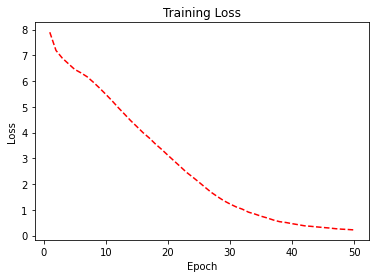

In [ ]:
plot_history(history)

In [ ]:
# The following class was made to make a single step prediction with the ML model
# The output of this function when calling generate_one_step is a single predicted char

class OneStep(tf.keras.Model):
  def __init__(self, model, words_from_ids, ids_from_words, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.words_from_ids = words_from_ids
    self.ids_from_words = ids_from_words

  @tf.function
  def generate_one_step(self, inputs, states=None):
    tf.config.run_functions_eagerly(True)
    # Convert strings to token IDs.

    input_chars = process_data(inputs)
    input_ids = self.ids_from_words(input_chars)
    input_ids = tf.ragged.constant([input_ids]).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    
    # Only use the last prediction. The rest of the predicted words are discarded.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)
    #predicted_ids

    # Convert from token ids to characters
    predicted_chars = self.words_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [ ]:
one_step_model = OneStep(model, words_from_ids, ids_from_words)

In [ ]:
# Since the ML model was not built as Sequential, the saved_model format must be used

tf.saved_model.save(one_step_model, '/content/gdrive/MyDrive/assets/one_step_sw')
one_step_reloaded = tf.keras.models.load_model('/content/gdrive/MyDrive/assets/one_step_sw')
one_step_reloaded.summary()

In [ ]:
start = time.time()
states = None
next_word = ['ANAKIN\n']
result = [next_word]

# "I" technically consists of capital letters, however we don't want to start a new line whenever it comes up
I_string = ids_from_words('I') 
A_string = ids_from_words('A') 

for n in range(100):
  next_word, states = one_step_model.generate_one_step(next_word, states=states)
  current_id = ids_from_words(next_word)

  if (str(next_word).isupper()):  #If the words is composed of all CAPS (exception for the word "I")
      if (current_id != I_string):  #A new line mark is added before and after the word composed entirely of capital letters (except "I")
        result.append('\n')  
        result.append(next_word)
        result.append('\n')
  else:
    result.append(' ')
    result.append(next_word)

result = list(itertools.chain(*result)) #Creates a list of strings instead of a list of lists
result = ''.join(result)

print(result)

ANAKIN
 jumps to the door frame of the elevator.
ANAKIN
 looks into the elevator shaft.
ANAKIN
 Artoo... do you copy? Artoo, do you copy? Artoo, do you hear me? Artoo, you do you copy? Artoo, do you hear me? Artoo, we need to be going up, not down.
PALPATINE
 continuing Anakin, there's be a Master?
OBI-WAN
 Oh no, you're quite right, but do have the most experience before you speak more loudly than their words. I'm depending on you.
ANAKIN
 For what? know.
OBI-WAN
 Break right and go high. down.
OBI-WAN
 Careful... we're heating up-twelve thousand... thirteen thousand...
